<a href="https://colab.research.google.com/github/Althaf0097/Demo/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [80]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [82]:
df['Target'] = data.target

In [83]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

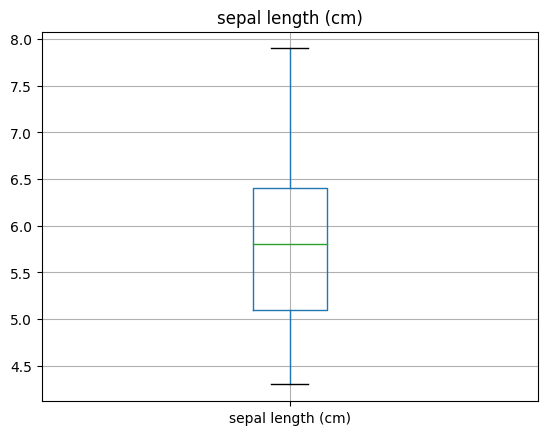

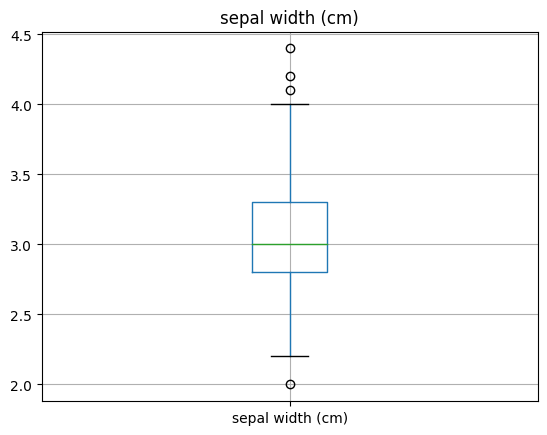

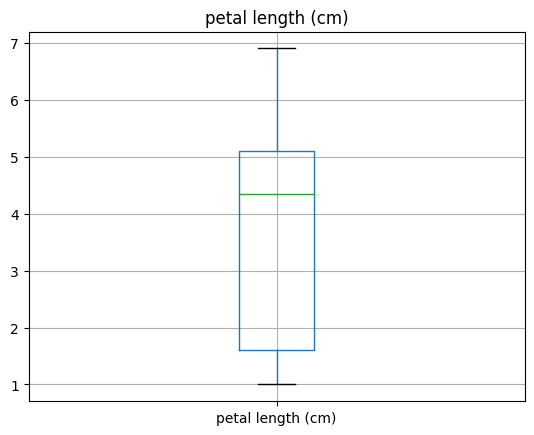

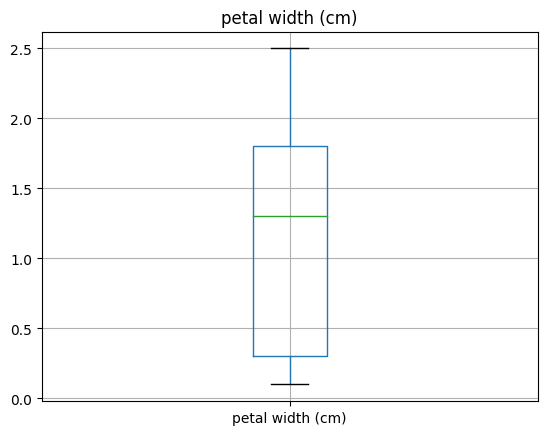

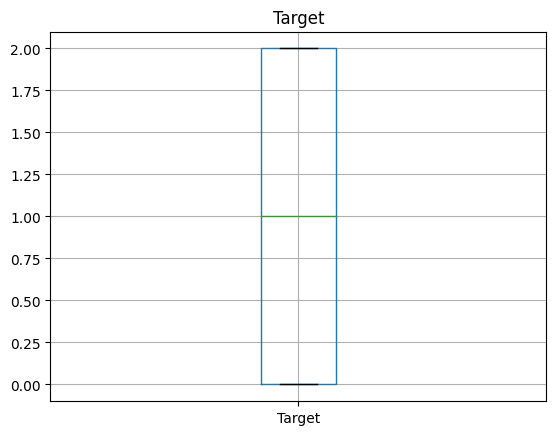

In [84]:
for column in df.columns:
  plt.figure()
  df.boxplot([column])
  plt.title(column)

In [85]:
outlier_cols = []
for column in df.columns:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  count = outliers.shape[0]
  print(f"Outliers in {column}: {count}")
  if count > 0:
    outlier_cols.append(column)
print(f'\n\nColumns that contain Outliers: {outlier_cols}')

Outliers in sepal length (cm): 0
Outliers in sepal width (cm): 4
Outliers in petal length (cm): 0
Outliers in petal width (cm): 0
Outliers in Target: 0


Columns that contain Outliers: ['sepal width (cm)']


In [86]:
for column in outlier_cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column] = df[column].clip(lower_bound, upper_bound)

In [87]:
df.shape

(150, 5)

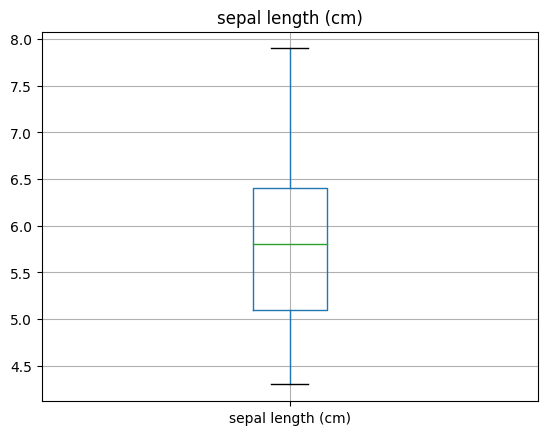

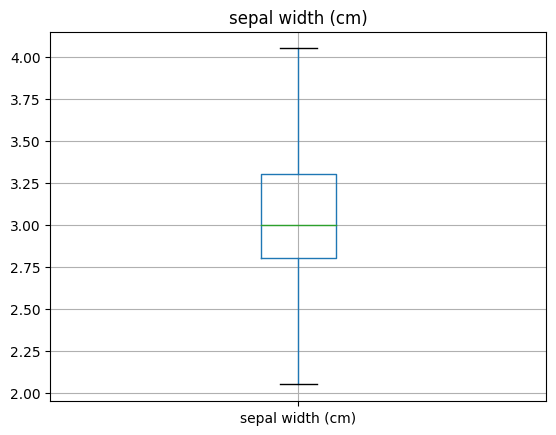

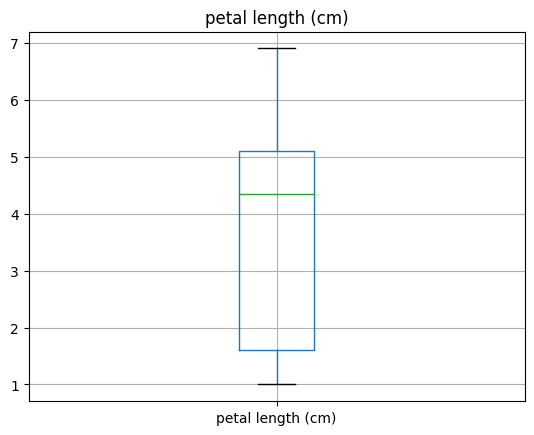

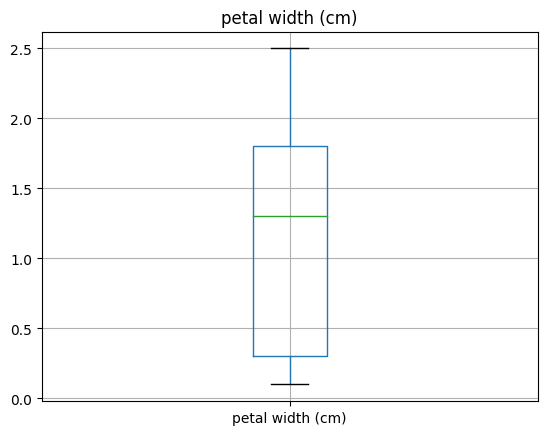

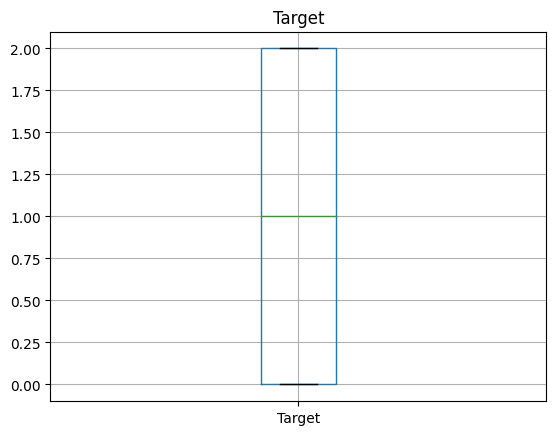

In [88]:
for column in df.columns:
  plt.figure()
  df.boxplot([column])
  plt.title(column)

In [89]:
from sklearn.preprocessing import MinMaxScaler
columns = df.columns
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667,1.0
146,0.555556,0.225,0.677966,0.750000,1.0
147,0.611111,0.475,0.711864,0.791667,1.0
148,0.527778,0.675,0.745763,0.916667,1.0


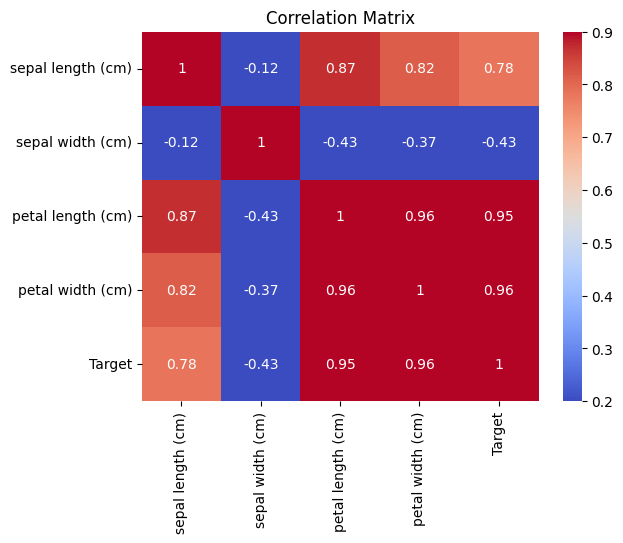

In [90]:
corr_matrix = df.corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True,vmin = 0.2,vmax=0.9, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split

x = df.drop('Target', axis=1)
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [95]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [96]:
knn_y_pred = knn.predict(x_test)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [98]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy:", accuracy)
class_report = classification_report(y_test, knn_y_pred)
print("Classification Report:\n", class_report)
cm = confusion_matrix(y_test, knn_y_pred)
print(cm)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


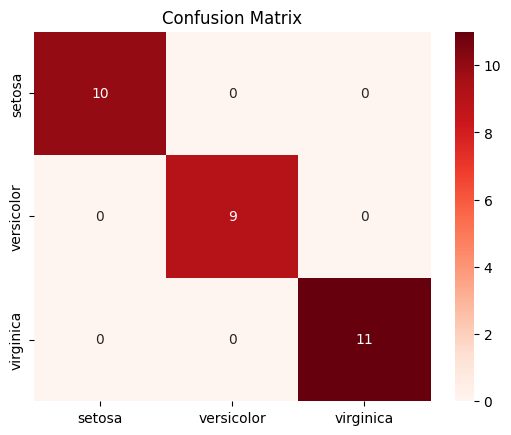

In [100]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',xticklabels=['setosa', 'versicolor', 'virginica'],yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title('Confusion Matrix')
plt.show()

In [104]:
from inspect import Parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameters grid
Param_grid = {
    'C': [ 0.01, 0.1, 1, 10, 100,],  # Regularization strength
    'penalty': ['l1', 'l2'],         # Type of regularizayion
    'solver': ['liblinear', 'saga']  # solver
}

# initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

#Perform grid search
grid_search = GridSearchCV(logreg, Param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.9583333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [107]:
grid_search.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')>

In [108]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}

In [109]:
best_logreg_model = LogisticRegression(C=100, penalty='l2', solver='saga', max_iter=1000)
best_logreg_model.fit(x_train, y_train)

LogisticRegression(C=100, max_iter=1000, solver='saga')

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Param_grid = {
    'n_neighbors': list(range(1, 11)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, Param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.9583333333333334


In [118]:
best_knn  = KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')
best_knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [122]:
from sklearn.svm import SVC

In [123]:
svm_model = SVC()

In [126]:
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)

In [127]:
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [130]:
dt_y_pred = dt_model.predict(x_test)

In [131]:
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



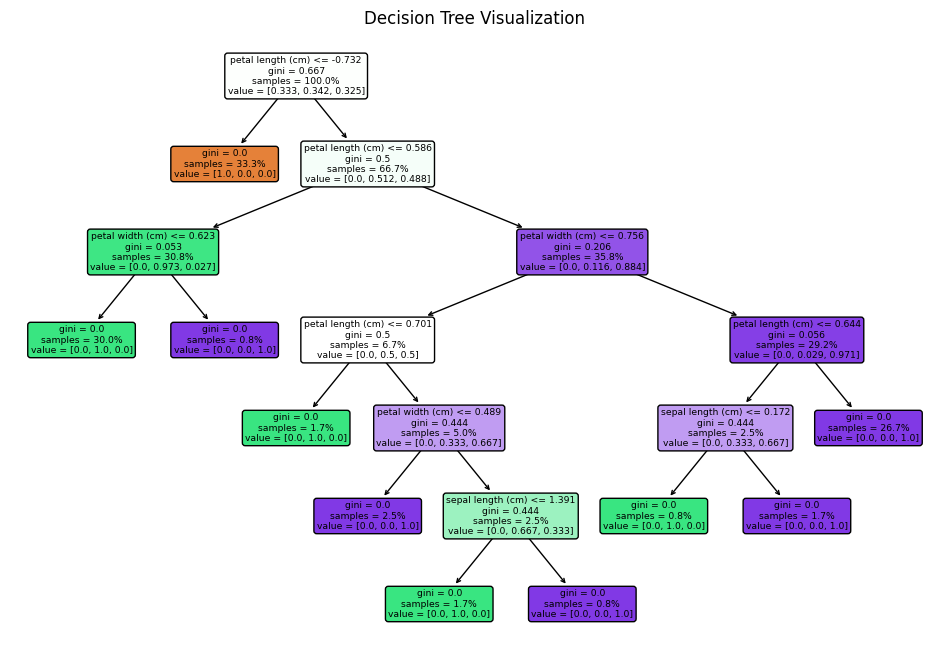

In [133]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, rounded=True,proportion=True, feature_names=x.columns)
plt.title("Decision Tree Visualization")
plt.show()

In [134]:
from  sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [135]:
rf_y_pred = rf_model.predict(x_test)

In [136]:
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



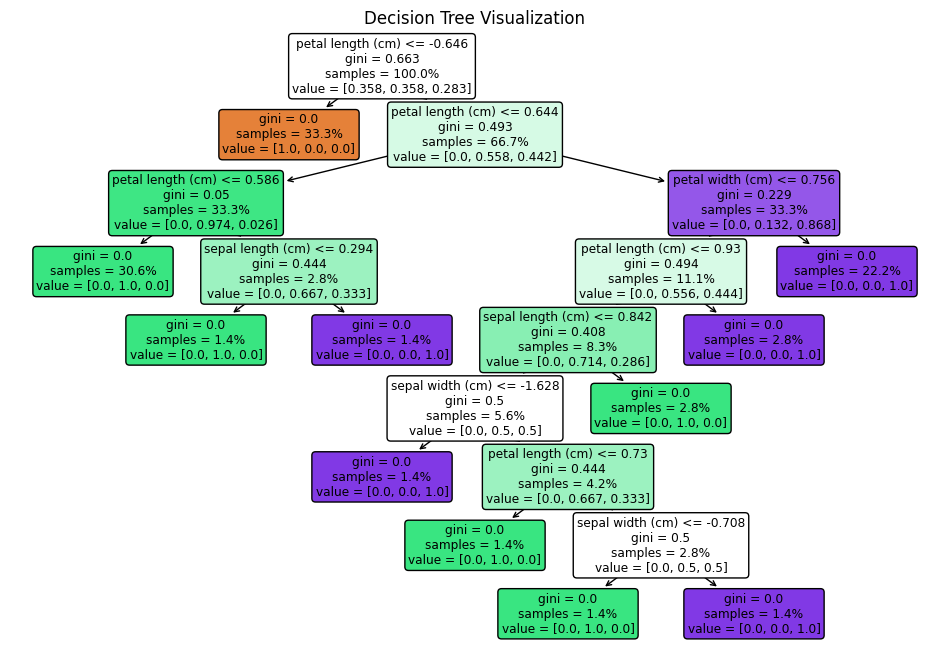

In [141]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], filled=True, rounded=True,proportion=True, feature_names=x.columns)
plt.title("Decision Tree Visualization")
plt.show()